# Support Vector Machine (SVM)

**Support Vector Machine (SVM)** is a classification approach developed in the computer science community in the 1990s. Since then, SVM has grown in popularity and is widely recognized as one of the best “out of the box” classifiers, showing strong performance across various settings.

The SVM is a generalization of a simple and intuitive classifier called the **Maximal Margin Classifier**. Although elegant and straightforward, this classifier has a limitation: it requires that the classes be linearly separable, which is often not the case with real-world data.

**Support Vector Classifier** is an extension of the maximal margin classifier that allows for application in a wider range of cases where linear separability is not guaranteed.


**Support Vector Machine** is an advanced version of the support vector classifier designed to accommodate non-linear class boundaries.

SVMs are primarily designed for binary classification, where there are two classes. It is common to hear people refer to the maximal margin classifier, the support vector classifier, and the support vector machine collectively as “support vector machines”. However, in this chapter, we will distinguish between these three concepts to provide clarity and avoid confusion.


# Maximal Margin Classifier

We need to define a **hyperplane** and introduce the concept of an **optimal separating hyperplane**.

### What Is a Hyperplane?

In a $p$-dimensional space, a **hyperplane** is a flat affine subspace of dimension $p - 1$. For example:
- In **two dimensions**, a hyperplane is a one-dimensional flat subspace—a **line**.
- In **three dimensions**, a hyperplane is a two-dimensional flat subspace—a **plane**.
- For **$p > 3$ dimensions**, although hard to visualize, the concept of a $(p - 1)$-dimensional flat subspace still holds.

#### Mathematical Definition of a Hyperplane

The mathematical definition of a hyperplane is relatively straightforward. In **two dimensions**, a hyperplane is defined by the equation:


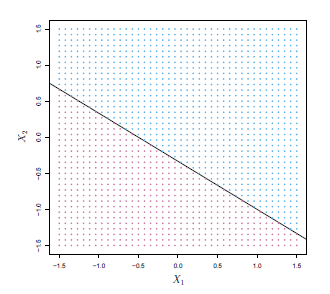

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0 \tag{1}
$$


where $\beta_0$, $\beta_1$, and $\beta_2$ are parameters. Equation (1) “defines” the hyperplane in the sense that any point $X = (X_1, X_2)^T$ satisfying (1) lies on this hyperplane. Since we are in two dimensions, this hyperplane is simply a line.

This concept extends to **$p$ dimensions**:

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p = 0 \tag{2}
$$


Equation (2) defines a $p$-dimensional hyperplane. In other words, if a point $X = (X_1, X_2, \dots, X_p)^T$ in $p$-dimensional space satisfies this equation, then it lies on the hyperplane.

Now, consider cases where $X$ does not satisfy (2). Specifically:
- If 

  $$
  \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p > 0, \tag{3}
  $$
  
  then $X$ lies on one side of the hyperplane.
  
  
  <br>
  
- Conversely, if

  $$
  \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p < 0, \tag{4}
  $$
  
  then $X$ lies on the opposite side of the hyperplane.

Thus, the hyperplane effectively **divides the $p$-dimensional space into two halves**. We can determine on which side of the hyperplane a point lies by calculating the sign of the left-hand side of (2).


### Classification Using a Separating Hyperplane

Suppose we have an **$n \times p$ data matrix** $X$ consisting of $n$ training observations in $p$-dimensional space:

$$
x_1 = 
\begin{bmatrix}
x_{11} \\
\vdots \\
x_{1p}
\end{bmatrix},
\ldots,
x_n = 
\begin{bmatrix}
x_{n1} \\
\vdots \\
x_{np}
\end{bmatrix}, \tag{5}
$$

where each observation $x_i$ is a $p$-dimensional vector representing the features of a single data point. For a new test observation $x^* = (x^*_1, \ldots, x^*_p)^T$, our goal is to classify $x^*$ correctly based on the training data.

This section explores a new approach based on the concept of a **separating hyperplane** for classification.

#### Defining a Separating Hyperplane

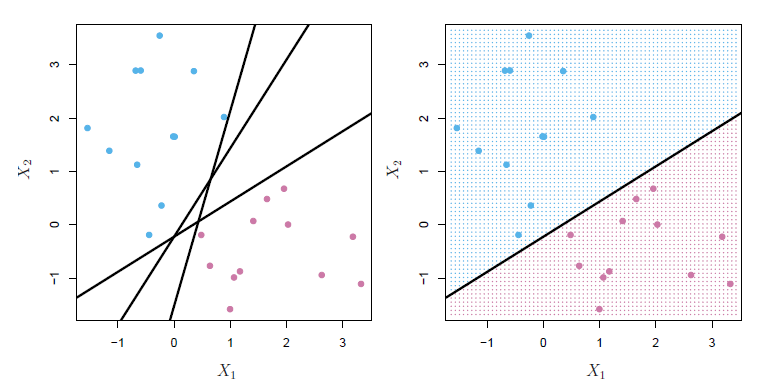

Suppose it is possible to construct a **hyperplane** that perfectly separates the training observations by their class labels. In the left panel of **Figure**, three examples of such separating hyperplanes are illustrated.

Let us label the observations from the **blue class** as $y_i = 1$ and those from the **purple class** as $y_i = -1$. A separating hyperplane has the following properties:
- For observations in the blue class:

  $$
  \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} > 0 \quad \text{if } y_i = 1, \tag{6}
  $$

<br>

- For observations in the purple class:

  $$
  \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} < 0 \quad \text{if } y_i = -1. \tag{7}
  $$

We can combine (6) and (7) into a single inequality:

$$
y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}) > 0 \quad \text{for all } i = 1, \dots, n. \tag{8}
$$

If a separating hyperplane exists, we can use it to construct a natural classifier. A test observation $x^*$ is classified based on which side of the hyperplane it lies. This is determined by the sign of the function:

$$
f(x^*) = \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \dots + \beta_p x^*_p.
$$

- If $f(x^*) > 0$, we classify $x^*$ as **Class 1**.
- If $f(x^*) < 0$, we classify $x^*$ as **Class -1**.

#### Interpretation of $f(x^*)$

The magnitude of $f(x^*)$ provides information about the confidence in our classification:
- If $f(x^*)$ is far from zero, then $x^*$ lies far from the hyperplane, indicating high confidence in the class assignment.
- If $f(x^*)$ is close to zero, then $x^*$ is near the hyperplane, suggesting less certainty in the classification.

As shown in the **Figure**, a classifier based on a separating hyperplane results in a **linear decision boundary**.


### The Maximal Margin Classifier

When our data can be perfectly separated using a hyperplane, there will often exist an **infinite number of possible separating hyperplanes**. This is because a given hyperplane can typically be shifted slightly or rotated without touching any of the training observations. For example, the left panel of **above Figure** illustrates three potential separating hyperplanes.

To build a classifier based on a separating hyperplane, we need a method to choose a single hyperplane among the infinite possibilities. A natural choice is the **maximal margin hyperplane**, also known as the **optimal separating hyperplane**. This is defined as the separating hyperplane that is **farthest from the training observations**. 

#### Margin and the Maximal Margin Hyperplane

For any given hyperplane, we can calculate the **perpendicular distance** from each training observation to the hyperplane. The smallest of these distances is known as the **margin**, which represents the minimal distance from the observations to the hyperplane.

The **maximal margin hyperplane** is the hyperplane that maximizes this margin, i.e., the hyperplane that has the **largest minimum distance** to the training observations. By choosing this hyperplane, we hope to find a decision boundary that will also classify test observations correctly by providing a buffer zone around the boundary.

This classifier, which assigns a test observation based on its position relative to the maximal margin hyperplane, is called the **maximal margin classifier**. Although this classifier often performs well, it may **overfit** when the feature space dimension $p$ is large.

If $\beta_0, \beta_1, \dots, \beta_p$ are the coefficients of the maximal margin hyperplane, then the maximal margin classifier assigns a class to a test observation $x^*$ based on the sign of:


$$
f(x^*) = \beta_0 + \beta_1 x^*_1 + \beta_2 x^*_2 + \dots + \beta_p x^*_p.
$$

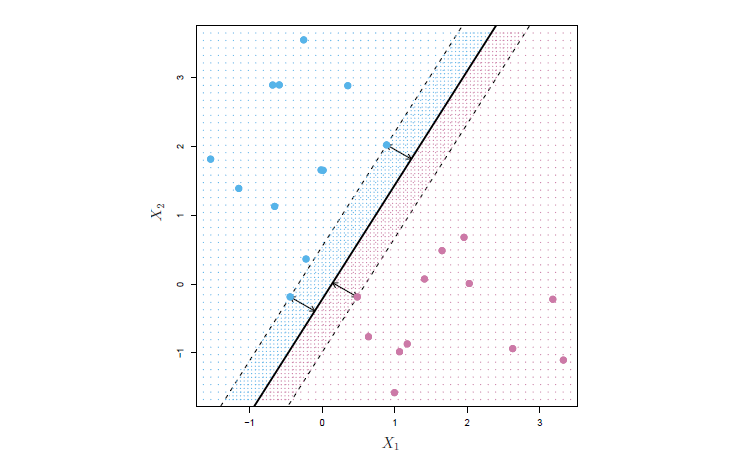

**Figure** illustrates the maximal margin hyperplane on the same dataset used in **Figure**. By comparing the previous section and this figures, we can see that the hyperplane in **Figure** achieves a greater minimal distance (or margin) between the observations and the hyperplane, representing the **mid-line of the widest “slab”** that can be positioned between the two classes.

#### Support Vectors and Their Role

In the **Figure**, there are three training observations that lie exactly on the margin, equidistant from the maximal margin hyperplane. These points are called **support vectors**. They are vectors in $p$-dimensional space (with $p=2$ in the Figure) and “support” the maximal margin hyperplane in the sense that any movement in these points will change the position of the hyperplane. 

Interestingly, the maximal margin hyperplane depends only on these **support vectors** and not on any other observations. The position of other points has no impact on the hyperplane, as long as they do not breach the boundary set by the margin. This property will be significant when we delve further into the **support vector classifier** and **support vector machines**, as it highlights the reliance of the model on a select subset of observations.


### Construction of the Maximal Margin Classifier

The maximal margin hyperplane is determined by solving the following **optimization problem**:


$$
\text{maximize}_{\beta_0, \beta_1, \dots, \beta_p, M} \, M \tag{9}
$$


subject to:
1. The constraint that the vector of coefficients is normalized:

   $$
   \sum_{j=1}^p \beta_j^2 = 1, \tag{10}
   $$
   
   
2. The constraint that ensures each observation is on the correct side of the hyperplane with a margin:
   
   $$
   y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}) \ge M \quad \text{for } i = 1, \dots, n. \tag{11}
   $$


#### Interpretation of the Constraints

This optimization problem (9)–(11) may appear complex but is actually straightforward when broken down:
- The constraint in (11), 

  $$
  y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}) \ge M,
  $$

    guarantees that each observation lies on the correct side of the hyperplane as long as $M$ is positive. In fact, this constraint ensures that each observation is **not only on the correct side but with a margin or "cushion"** from the hyperplane, provided that $M > 0$.
    
    <br>

- The normalization constraint in (10),
  
  $$
  \sum_{j=1}^p \beta_j^2 = 1,
  $$
  
  is not required to define a hyperplane (since any scaled version of the hyperplane equation still defines the same hyperplane). However, including this constraint **adds meaning to (11)**, as it ensures that the **perpendicular distance** from each observation to the hyperplane is given by:
  
  $$
  y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}).
  $$

Together, constraints (10) and (11) ensure that each observation is correctly classified and lies at least a distance $M$ from the hyperplane. Therefore, $M$ represents the **margin** of the hyperplane, and this optimization problem chooses $\beta_0, \beta_1, \dots, \beta_p$ to **maximize the margin**. This is the very definition of the maximal margin hyperplane!

While the problem (9)–(11) can be solved efficiently using optimization techniques.


### The Non-separable Case

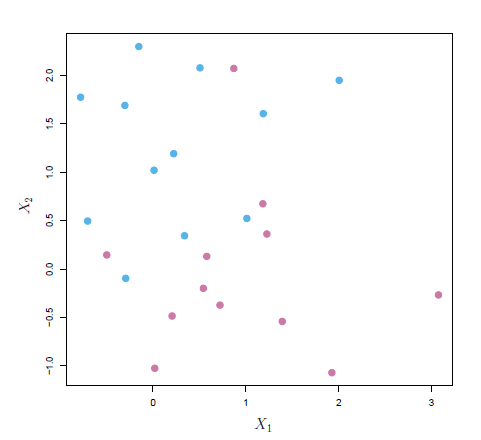

The **maximal margin classifier** provides a straightforward approach for classification, but it relies on the existence of a **separating hyperplane**. Unfortunately, in many real-world scenarios, such a hyperplane may not exist, meaning that the two classes cannot be perfectly separated by a linear boundary.

In cases where no separating hyperplane exists, the optimization problem (9)–(11) has no feasible solution with $M > 0$. **Figure** provides an example where it is impossible to exactly separate the two classes using a hyperplane. In such situations, we cannot apply the maximal margin classifier directly.

To address this limitation, we can generalize the concept of a separating hyperplane to create a boundary that **nearly separates the classes**. This approach introduces a **soft margin**, allowing some observations to be misclassified or lie within the margin, which relaxes the strict separability requirement.

This **generalization of the maximal margin classifier** to cases where perfect separation is not achievable is known as the **support vector classifier**. 


## Support Vector Classifiers

### Overview of the Support Vector Classifier

Even if a **separating hyperplane** exists, constructing a classifier based on it may not be ideal in certain cases, as it will necessarily **perfectly classify all training observations**. This can lead to excessive sensitivity to individual points.

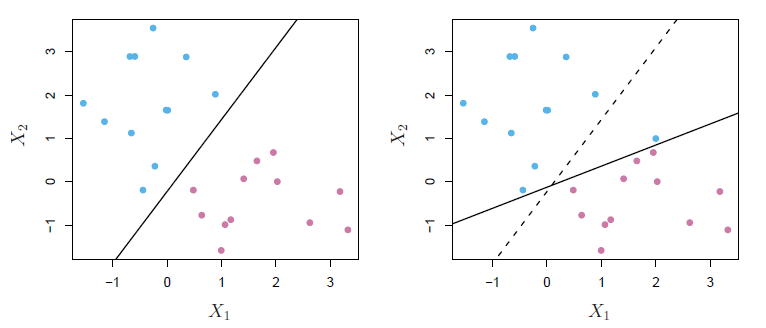

For instance, in **Figure**, adding just one observation (right panel) causes a significant shift in the maximal margin hyperplane. This new hyperplane has a notably **small margin**, which is problematic for several reasons:
- **Confidence in Classification**: As discussed previously, the margin represents our confidence that an observation is correctly classified. A smaller margin reduces this confidence.
- **Sensitivity to Outliers**: The dramatic change in the hyperplane’s position due to a single additional observation indicates that the classifier may be **overfitting** the training data.

To address this, we might prefer a classifier based on a hyperplane that does **not perfectly separate** the two classes, which could lead to:
- Greater **robustness** to individual observations,
- **Better classification** of the majority of the training observations.

In other words, it may be worthwhile to allow some misclassification among the training observations in order to improve overall classification accuracy.

# The Support Vector Classifier (Soft Margin Classifier)

The **support vector classifier**, also known as the **soft margin classifier**, is designed to balance this trade-off. Rather than seeking the largest possible margin that classifies all observations correctly, the soft margin classifier allows some observations to be:
- On the **wrong side of the margin**, or even
- On the **wrong side of the hyperplane**, meaning they are misclassified.

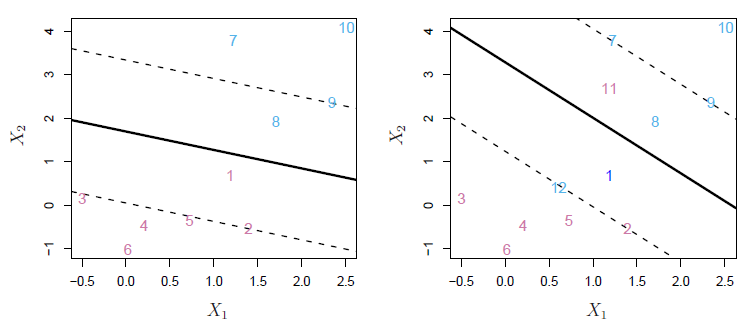

The margin is considered **soft** because it can be violated by certain training observations. An example of this is shown in the left panel of **Figure**, where most observations are correctly classified, but a few fall within the margin on the incorrect side.

In situations where a separating hyperplane does not exist, some observations will inevitably be on the wrong side of the hyperplane. This means that some training observations will be **misclassified** by the support vector classifier, as illustrated in the right panel of **Figure**.


### Details of the Support Vector Classifier

The **support vector classifier** classifies a test observation based on which side of a hyperplane it lies. This hyperplane is selected to separate most of the training observations into two classes, although some misclassification is allowed. Formally, it is determined by solving the following optimization problem:

$$
\text{maximize}_{\beta_0, \beta_1, \dots, \beta_p, \epsilon_1, \dots, \epsilon_n, M} \, M \tag{12}
$$
subject to:
1. **Normalization Constraint**:
   
   $$
   \sum_{j=1}^p \beta_j^2 = 1, \tag{13}
   $$
   
2. **Margin Constraint**:
   
   $$
   y_i (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}) \ge M (1 - \epsilon_i), \tag{14}
   $$
   
   <br>
   
3. **Slack Variable Constraints**:
   
   $$
   \epsilon_i \ge 0,
   $$
   
   $$
   \sum_{i=1}^n \epsilon_i \le C, \tag{15}
   $$
   
   where $C$ is a **nonnegative tuning parameter**.

In this formulation:

- $M$ represents the **width of the margin**, which we aim to maximize.

- $\epsilon_1, \dots, \epsilon_n$ are **slack variables** that allow certain observations to be on the wrong side of the margin or the hyperplane, providing flexibility in cases where perfect separation is not possible.


Once this optimization problem (12)–(15) is solved, we classify a test observation $x^*$ by determining the sign of:

$$
f(x^*) = \beta_0 + \beta_1 x^*_1 + \dots + \beta_p x^*_p.
$$


#### Interpreting Slack Variables ($\epsilon_i$)

The **slack variable** $\epsilon_i$ indicates the location of the $i$th observation relative to the hyperplane and the margin:

- If $\epsilon_i = 0$, the $i$th observation is on the correct side of the margin.

- If $\epsilon_i > 0$, the observation is on the wrong side of the margin, meaning it has **violated the margin**.

- If $\epsilon_i > 1$, the observation is even on the wrong side of the hyperplane, resulting in **misclassification**.

#### Role of the Tuning Parameter $C$

The parameter $C$ controls the **number and severity of margin violations**:

- When $C=0$, there is no tolerance for violations, and all $\epsilon_i = 0$. This constraint results in the **maximal margin classifier** if a perfect separation is possible.

- For $C > 0$, the sum of the slack variables $\sum_{i=1}^n \epsilon_i \le C$ determines the allowable "budget" for margin violations. A larger $C$ increases tolerance for violations, allowing a **wider margin**. A smaller $C$ reduces this tolerance, resulting in a **narrower margin**.

In practice, $C$ is treated as a **tuning parameter** selected via cross-validation to balance the **bias-variance trade-off**:

- **Small $C$**: This creates a narrow margin, with fewer violations. The resulting classifier is highly fit to the data, potentially with **low bias but high variance**.

- **Large $C$**: This allows a wider margin and more violations, leading to a classifier with **higher bias but lower variance**.


### Support Vector Classifier with Different Values of C

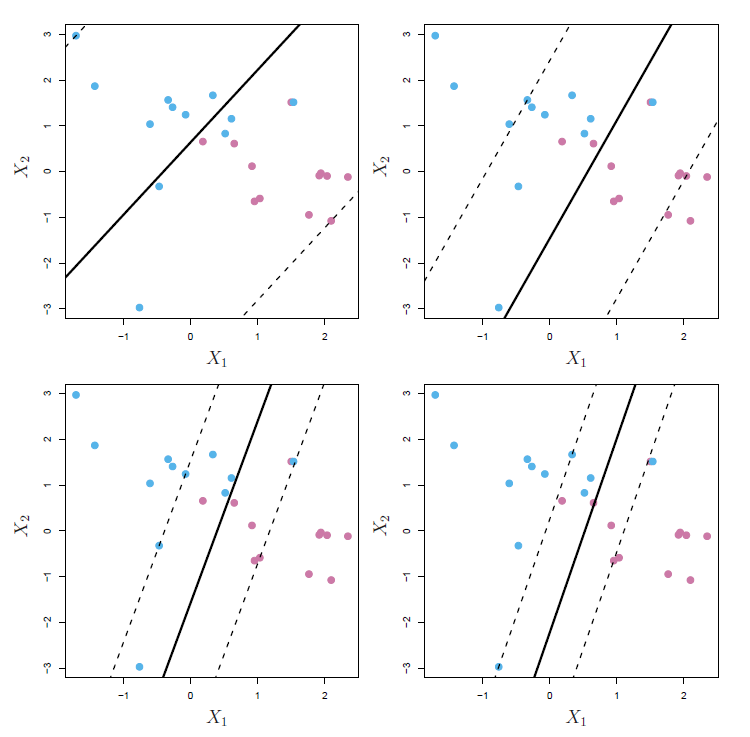

In the figure above, the **support vector classifier** was fit using four different values of the tuning parameter $C$. The panels show how the margin changes with different values of $C$:

- **Top Left Panel**: The largest value of $C$ was used, resulting in a **wide margin**. With a high $C$ value, the model allows more tolerance for observations on the wrong side of the margin, leading to a larger margin width.
  
- **Top Right, Bottom Left, and Bottom Right Panels**: Each of these panels uses a progressively smaller value of $C$. As $C$ decreases, the model becomes **less tolerant** of observations on the wrong side of the margin. This narrower margin enforces stricter separation criteria, minimizing the misclassifications within the margin.

Overall:
- When $C$ is **large**, the model has a **high tolerance for margin violations**, resulting in a **wider margin**.
- As $C$ **decreases**, tolerance for margin violations reduces, leading to a **narrower margin**.

This parameter $C$ effectively controls the **bias-variance trade-off**:
- A **large $C$** allows more flexibility, fitting the data with a higher tolerance for errors (potentially lower variance, higher bias).
- A **small $C$** fits the data more strictly, with fewer errors allowed (potentially lower bias, higher variance).

This demonstrates how adjusting $C$ affects the support vector classifier's decision boundary and generalization.

### Support Vectors and Their Role

An interesting property of this optimization is that **only observations lying on the margin or violating the margin influence the hyperplane** and, thus, the classifier. Observations on the correct side of the margin do not affect the solution. These critical observations are called **support vectors**:
- Support vectors include observations lying exactly on the margin or on the wrong side of the margin/hyperplane.
- Changing the position of support vectors affects the classifier, whereas moving other points does not, provided they remain on the correct side of the margin.

The **number of support vectors** depends on $C$:

- **Large $C$** results in a wider margin and more support vectors, leading to a classifier with low variance and potentially high bias.

- **Small $C$** yields fewer support vectors, a classifier with low bias, but possibly higher variance.

The support vector classifier’s reliance on a subset of observations (the support vectors) makes it **robust to outliers far from the hyperplane**. This property differs from other methods, like **linear discriminant analysis (LDA)**, which depends on the mean and covariance of all observations in each class. In contrast, logistic regression shares some robustness to outliers, a property it shares with the support vector classifier.


# Support Vector Machines

We begin by exploring a general approach for transforming a linear classifier into one capable of producing **non-linear decision boundaries**. Then, we introduce the **support vector machine (SVM)**, which implements this transformation automatically.

### Classification with Non-Linear Decision Boundaries


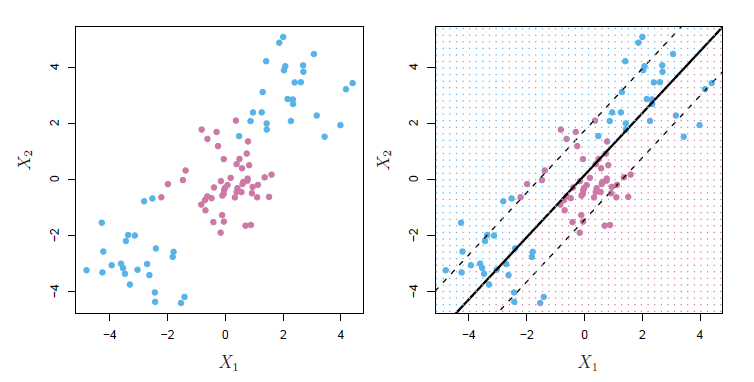

The **support vector classifier** is effective when class boundaries are linear, but in many real-world scenarios, **non-linear boundaries** are more appropriate. **Figure** (left panel) illustrates data with a non-linear boundary that cannot be effectively separated by a linear classifier.

A similar situation arises with **linear regression**, which can struggle with non-linear relationships. To address this, we expand the **feature space** by including higher-order terms (e.g., quadratic or cubic terms). For the support vector classifier, we can address non-linear boundaries in a similar way by including quadratic, cubic, and higher-order polynomial terms of the predictors.

For example, instead of using $p$ features, $X_1, X_2, \dots, X_p$, we could expand to $2p$ features, $X_1, X_1^2, X_2, X_2^2, \dots, X_p, X_p^2$. The optimization problem becomes:


$$
\text{maximize}_{\beta_0, \beta_{11}, \beta_{12}, \dots, \beta_{p1}, \beta_{p2}, \epsilon_1, \dots, \epsilon_n, M} \, M \tag{16}
$$


subject to:


$$
y_i \left( \beta_0 + \sum_{j=1}^p \beta_{j1} x_{ij} + \sum_{j=1}^p \beta_{j2} x_{ij}^2 \right) \ge M(1 - \epsilon_i), \quad \sum_{i=1}^n \epsilon_i \le C, \quad \epsilon_i \ge 0,
$$


$$
\sum_{j=1}^p \sum_{k=1}^2 \beta_{jk}^2 = 1.
$$

This approach can yield **non-linear decision boundaries**. In the expanded feature space, the boundary remains linear, but it appears non-linear in the original feature space.


### The Support Vector Machine

The **Support Vector Machine (SVM)** is an extension of the **support vector classifier**. It enlarges the feature space to allow for **non-linear decision boundaries** by using a method called **kernels**. Here, we discuss the basics of this approach, which allows SVMs to find optimal boundaries even when classes are not linearly separable in the original feature space.

---

### The Role of Kernels in SVM

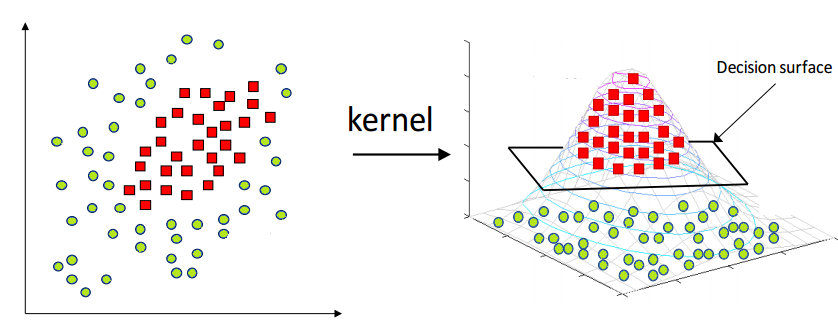

We sometimes need to **expand the feature space** to accommodate non-linear class boundaries. Kernels provide a computationally efficient way to perform this expansion without explicitly calculating each feature transformation.

Instead of transforming the feature space directly, SVMs use a **kernel function** that calculates similarity between observations in the expanded feature space. 

---

### SVM Optimization Using Inner Products

To understand how SVMs use kernels, we first look at how the **support vector classifier** solution depends on the **inner products** between observations rather than the observations themselves.

The **inner product** of two vectors $a$ and $b$ (both of length $r$) is defined as:
$$
\langle a, b \rangle = \sum_{i=1}^{r} a_i b_i.
$$

For two observations $x_i$ and $x_{i'}$, the inner product is:
$$
\langle x_i, x_{i'} \rangle = \sum_{j=1}^{p} x_{ij} x_{i'j}. \tag{17}
$$

It turns out that:

- The linear support vector classifier can be represented as:
  $$
  f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i \langle x, x_i \rangle, \tag{18}
  $$
  where $\alpha_i$ are parameters associated with each training observation.
  
- To estimate the parameters $\alpha_1, \dots, \alpha_n$ and $\beta_0$, we only need the inner products $\langle x_i, x_{i'} \rangle$ between all pairs of training observations $i$ and $i'$. This involves $n(n - 1)/2$ unique pairs among $n$ items.

In equation (18), to evaluate $f(x)$, we compute the inner product between the new point $x$ and each training point $x_i$. Importantly, only the **support vectors** have non-zero $\alpha_i$ values. Thus, the function $f(x)$ simplifies to only include terms for the support vectors:
$$
f(x) = \beta_0 + \sum_{i \in S} \alpha_i \langle x, x_i \rangle, \tag{19}
$$
where $S$ is the set of indices for the support vectors. This reduction significantly reduces computation.

---

### Kernels as a Generalization of Inner Products

Now, suppose we replace each inner product $\langle x_i, x_{i'} \rangle$ in equation (17) with a more general function $K(x_i, x_{i'})$, known as a **kernel**. A kernel function quantifies the similarity between two observations.

For example:
- A **linear kernel** is simply the standard inner product:
  $$
  K(x_i, x_{i'}) = \sum_{j=1}^{p} x_{ij} x_{i'j}, \tag{21}
  $$
  which results in the same linear classifier as before.

However, other forms of $K(x_i, x_{i'})$ allow us to obtain non-linear boundaries.

---

### Non-Linear Kernels

#### Polynomial Kernel

One option is to replace each inner product $\sum_{j=1}^{p} x_{ij} x_{i'j}$ with:

$$
K(x_i, x_{i'}) = (1 + \sum_{j=1}^{p} x_{ij} x_{i'j})^d, \tag{22}
$$


where $d$ is the **degree** of the polynomial. This function is called a **polynomial kernel of degree $d$**. When $d > 1$, it enables the support vector classifier to fit **non-linear boundaries** in the original feature space. Essentially, this polynomial kernel corresponds to performing the support vector classifier in a higher-dimensional space involving polynomials of degree $d$.

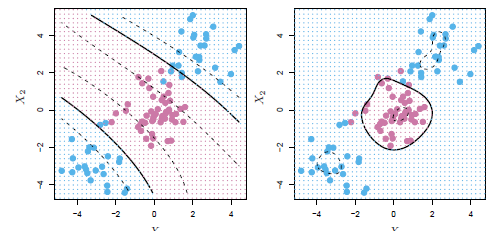

For example, using a polynomial kernel with $d = 3$ produces cubic decision boundaries, as shown in the left panel of **Figure**. When $d = 1$, this reduces to the original **linear support vector classifier**.

#### Radial Basis Function (RBF) Kernel

Another popular kernel is the **Radial Basis Function (RBF) kernel**, defined as:

$$
K(x_i, x_{i'}) = \exp\left(-\gamma \sum_{j=1}^{p} (x_{ij} - x_{i'j})^2\right), \tag{24}
$$

where $\gamma$ is a positive constant. The right panel of **Figure** shows an example of an SVM with an RBF kernel, which effectively separates non-linear data.

The RBF kernel’s behavior is **local**: if a test observation $x^*$ is far from a training observation $x_i$, then the term $\sum_{j=1}^{p} (x_{ij} - x_{i'j})^2$ will be large, causing $K(x^*, x_i) = \exp\left(-\gamma \sum_{j=1}^{p} (x_{ij} - x_{i'j})^2\right)$ to approach zero. Consequently, distant points have minimal influence on $f(x^*)$, allowing the RBF kernel to focus primarily on nearby points.

---

### Advantages of Kernels

Using kernels allows us to enlarge the feature space **implicitly** without computing each transformation explicitly. Instead, we only calculate $K(x_i, x_{i'})$ for all distinct pairs $i$ and $i'$, avoiding explicit calculations in the expanded feature space.

This is particularly advantageous for high-dimensional applications where the feature space is large, as explicit computation becomes infeasible. For some kernels, like the RBF kernel in equation (24), the feature space is infinite-dimensional, meaning that explicit computations are impossible, and kernels offer an efficient solution.

## Common Kernel Functions in Support Vector Machines (SVMs)

Here are some of the most commonly used **kernel functions** in Support Vector Machines (SVMs), each suited to different types of data and decision boundaries:

---

### 1. Linear Kernel
   - **Formula**: $ K(x_i, x_j) = x_i \cdot x_j $
   - **Description**: Computes the inner product of two vectors, resulting in a linear decision boundary. Used when data is linearly separable or nearly so.

---

### 2. Polynomial Kernel
   - **Formula**: $ K(x_i, x_j) = (1 + x_i \cdot x_j)^d $
   - **Parameters**: Degree $ d $ (controls the flexibility of the boundary)
   - **Description**: Projects data into a higher-dimensional polynomial space, allowing for non-linear boundaries. Increasing $ d $ adds complexity to the boundary, which is useful for data with polynomial patterns.

---

### 3. Radial Basis Function (RBF) Kernel (also known as Gaussian Kernel)
   - **Formula**: $ K(x_i, x_j) = \exp\left(-\gamma ||x_i - x_j||^2\right) $
   - **Parameters**: $ \gamma $ (controls the influence of each training example; a higher $ \gamma $ leads to tighter, more localized boundaries)
   - **Description**: Creates a non-linear decision boundary by considering similarity between points based on their distance. Effective in high-dimensional spaces and where there is no clear linear or polynomial relationship.

---

### 4. Sigmoid Kernel (similar to neural network activation function)
   - **Formula**: $ K(x_i, x_j) = \tanh(\alpha x_i \cdot x_j + c) $
   - **Parameters**: $ \alpha $ and $ c $ (constants that control the shape of the decision boundary)
   - **Description**: Resembles the behavior of a neural network layer and can create complex decision boundaries. However, it’s less commonly used than RBF due to sensitivity to parameter tuning.

---

### 5. Laplacian Kernel
   - **Formula**: $ K(x_i, x_j) = \exp\left(-\frac{||x_i - x_j||}{\sigma}\right) $
   - **Parameters**: $ \sigma $ (controls the smoothness of the decision boundary)
   - **Description**: Similar to the RBF kernel but uses the **Manhattan distance** $ ||x_i - x_j|| $ instead of the Euclidean distance, making it effective for capturing different distance metrics.

---

### 6. Exponential Kernel
   - **Formula**: $ K(x_i, x_j) = \exp\left(-\gamma ||x_i - x_j||\right) $
   - **Parameters**: $ \gamma $ (controls the influence of each point)
   - **Description**: Similar to the Laplacian kernel but sometimes used with larger distances. Often applied in probabilistic models for spatial data.

---

### 7. Chi-Square Kernel
   - **Formula**: $ K(x_i, x_j) = \exp\left(-\gamma \sum \frac{(x_i - x_j)^2}{x_i + x_j}\right) $
   - **Parameters**: $ \gamma $ (controls the sensitivity of the kernel)
   - **Description**: Effective in computer vision and image processing tasks, as it measures similarity based on the Chi-square distance.

---


These kernels allow SVMs to build flexible and complex decision boundaries tailored to the specific distribution and structure of the data.


# Implementation with Numpy


## Data: Iris data

The **Iris dataset** is a classic dataset in machine learning and statistical analysis, widely used for testing classification algorithms. It contains information about three species of iris flowers:

1. **Setosa**
2. **Versicolor**
3. **Virginica**

Each species is represented by 50 samples, giving a total of 150 samples in the dataset.

### Features
The dataset includes four features for each sample:
- **Sepal Length (cm)**: Length of the sepal in centimeters.
- **Sepal Width (cm)**: Width of the sepal in centimeters.
- **Petal Length (cm)**: Length of the petal in centimeters.
- **Petal Width (cm)**: Width of the petal in centimeters.

### Target
- **Species**: The species of the iris flower, represented by three categories: *Setosa*, *Versicolor*, and *Virginica*.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset from sklearn
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map target values to species names
iris_df['species'] = iris_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


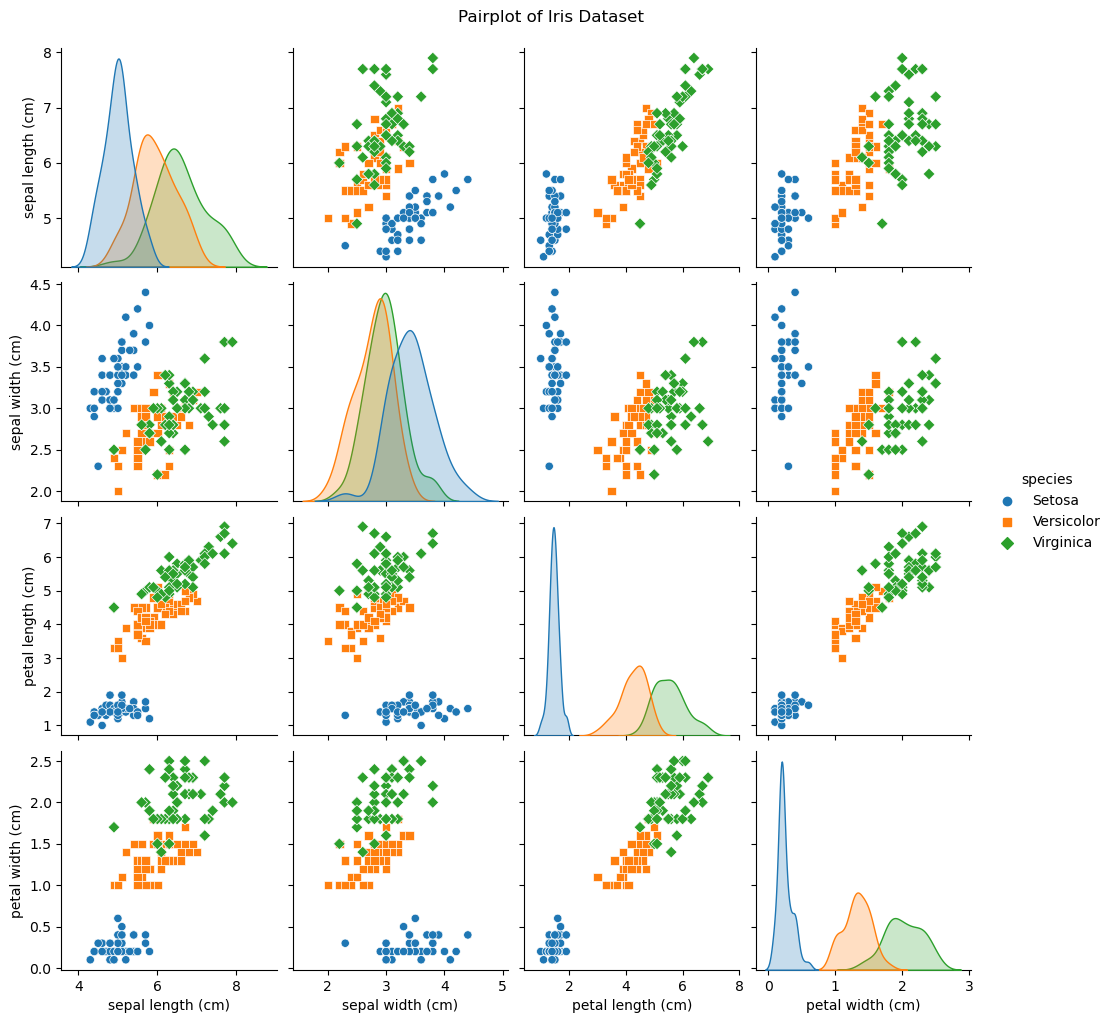

In [2]:
# Pairplot to visualize relationships between features, colored by species
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


## Setosa vs. Versicolor

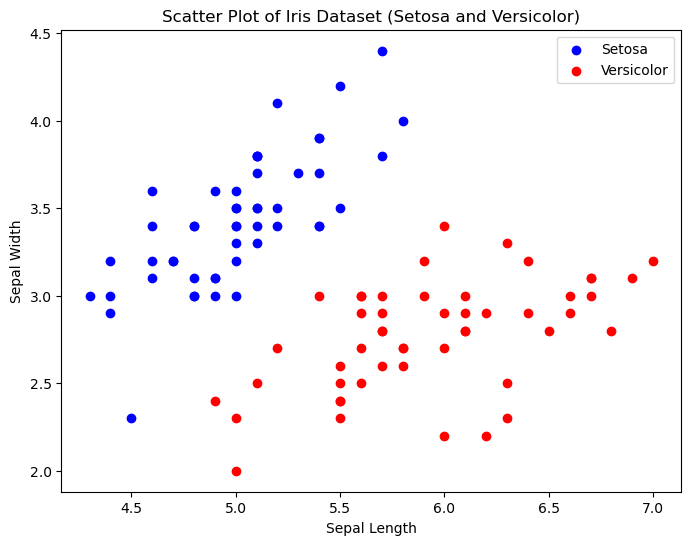

In [3]:
X = iris.data[:100, :2]  # Take only the first 100 samples and first two features for simplicity
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for binary classification

# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title("Scatter Plot of Iris Dataset (Setosa and Versicolor)")
plt.show()


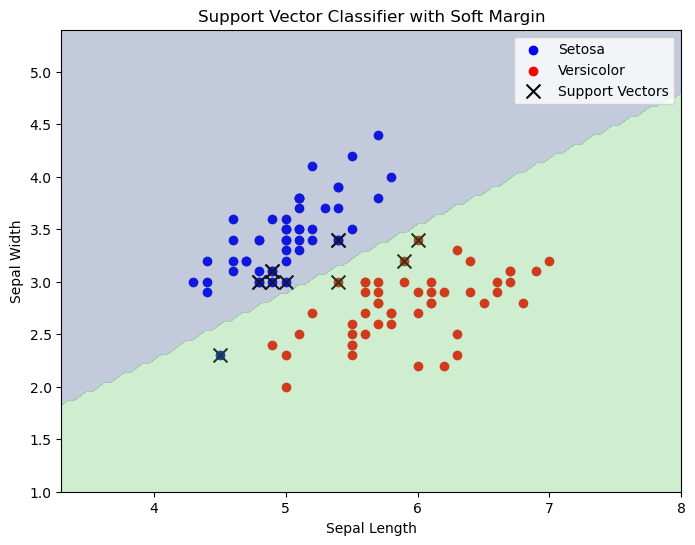

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Support Vector Classifier (Soft Margin) with budgeted margin violations via C
def support_vector_classifier(X, y, C=1.0, epochs=1000, lr=0.001):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    support_vectors = []  # List to store identified support vectors

    for epoch in range(epochs):
        for i in range(len(y)):
            # Calculate margin and hinge loss condition
            margin = y[i] * (np.dot(X[i], w) + b)
            # Apply gradient updates based on the hinge loss condition
            if margin < 1:  # If margin is violated
                # Update weights and bias to reduce hinge loss, incorporating C as a penalty for violations
                w += lr * (C * y[i] * X[i] - 2 * (1 / epochs) * w)
                b += lr * C * y[i]
            else:
                # Regularization update for correctly classified points
                w -= lr * (2 * (1 / epochs) * w)
    
    # Identify support vectors (points on or within the margin boundary)
    for i in range(len(y)):
        if y[i] * (np.dot(X[i], w) + b) <= 1:
            support_vectors.append(X[i])

    # Convert support vector list to numpy array
    support_vectors = np.array(support_vectors) if support_vectors else np.empty((0, X.shape[1]))
    return w, b, support_vectors

# Plot decision boundary and support vectors
def plot_decision_boundary(X, y, w, b, support_vectors, title):
    plt.figure(figsize=(8, 6))
    
    # Plot the data points
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    
    # Plot support vectors if they exist
    if support_vectors.size > 0:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='x', s=100, label='Support Vectors')
    
    # Define plot ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Calculate the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z > 0, alpha=0.3)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title(title)
    plt.show()
    
w, b, support_vectors = support_vector_classifier(X, y, C= 1)
plot_decision_boundary(X, y, w, b, support_vectors, "Support Vector Classifier with Soft Margin")


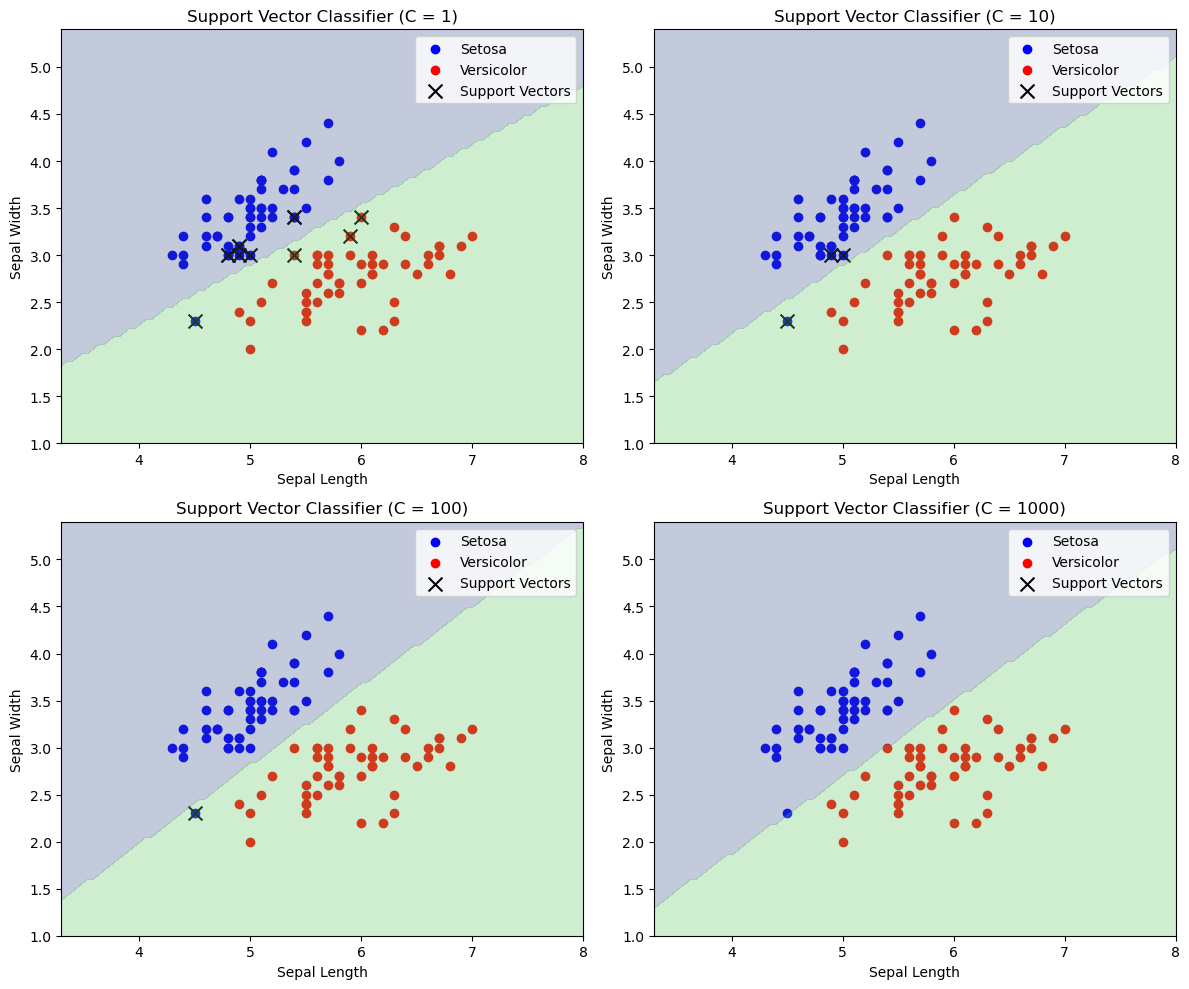

In [5]:
# Define the plotting function with support vectors
def plot_decision_boundary(X, y, w, b, support_vectors, title, ax):
    # Plot the data points
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    
    # Plot support vectors with 'x' markers
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='x', s=100, label='Support Vectors')
    
    # Define plot ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Calculate the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()
    ax.set_title(title)

# Train and plot the classifier for different values of C
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
C_values = [1, 10, 100, 1000]
titles = [f'Support Vector Classifier (C = {C})' for C in C_values]

for i, (C, ax) in enumerate(zip(C_values, axes.ravel())):
    # Train the classifier with different values of C
    w, b, support_vectors = support_vector_classifier(X, y, C=C)
    plot_decision_boundary(X, y, w, b, support_vectors, titles[i], ax)

plt.tight_layout()
plt.show()


### Hinge Loss in Support Vector Classifier

**Hinge Loss** is a commonly used loss function in binary classification tasks, particularly in support vector machines (SVM). The purpose of Hinge Loss is to penalize points that:

- Lie on the wrong side of the margin (i.e., are misclassified),
- Lie within the margin (i.e., are correctly classified but too close to the decision boundary).

For each training point $(X[i], y[i])$, the Hinge Loss is calculated as:

$$
\text{Hinge Loss} = \max(0, 1 - y[i] \cdot f(X[i]))
$$

where:
- $y[i]$ is the actual label $(+1$ or $-1)$,
- $f(X[i]) = w \cdot X[i] + b$ is the classifier's predicted value for $X[i]$, which defines the decision boundary,
- $1 - y[i] \cdot f(X[i])$ represents the "margin error," showing how far the prediction is from satisfying the margin constraint.

### Gradient Descent Updates Based on Hinge Loss (C has differenct meaning with Tuning parameter above) 

When the Hinge Loss is positive, **Gradient Descent** is applied to update the weights $w$ and bias $b$, pushing the decision boundary in a direction that reduces the Hinge Loss.

#### Gradient Descent Update Rules

1. **Misclassified Point (Hinge Loss > 0):**

   If a point lies within the margin or is misclassified, $w$ and $b$ are updated as follows:

   - **Weight Update:**

     $$
     w \leftarrow w + \text{lr} \times \left(C \cdot y[i] \cdot X[i] - 2 \times \frac{1}{\text{epochs}} \times w\right)
     $$

     - The term $C \cdot y[i] \cdot X[i]$ moves $w$ in the direction that reduces the Hinge Loss for $X[i]$.
     - The **Regularization Term** $2 \times \frac{1}{\text{epochs}} \times w$ reduces $w$'s magnitude to control model complexity and prevent it from growing excessively.

   - **Bias Update:**

     $$
     b \leftarrow b + \text{lr} \times C \times y[i]
     $$

     This adjustment moves the decision boundary closer to correctly classifying $X[i]$.

2. **Correctly Classified Point (Hinge Loss = 0):**

   If the point is correctly classified and lies beyond the margin (i.e., $\text{margin} \ge 1$), no hinge loss adjustment is needed. Instead, we apply only the regularization term to control the weights:

   $$
   w \leftarrow w - \text{lr} \times \left(2 \times \frac{1}{\text{epochs}} \times w\right)
   $$

   This regularization step helps prevent $w$ from growing too large, keeping the decision boundary largely unchanged for correctly classified points outside the margin.


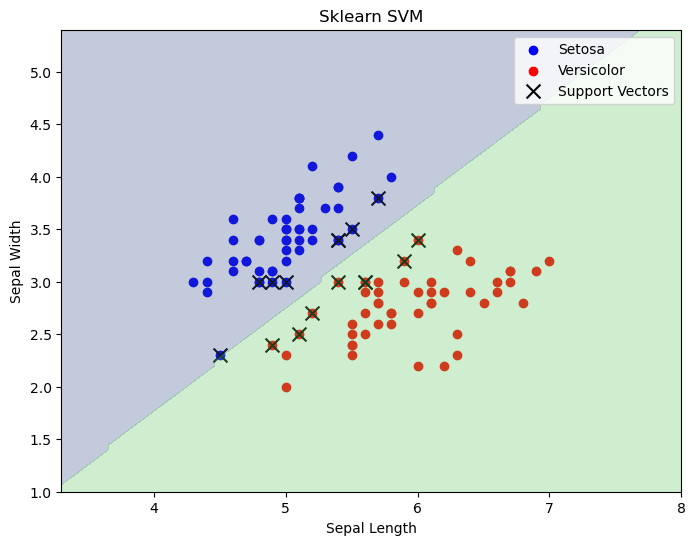

In [6]:
from sklearn.svm import SVC

# Train using sklearn's SVM with a linear kernel
sklearn_svm = SVC(kernel='linear', C=1)
sklearn_svm.fit(X, y)

# Get support vectors from sklearn's SVM
sklearn_support_vectors = sklearn_svm.support_vectors_

# Plot decision boundary and support vectors for sklearn's SVM
def plot_sklearn_svm(X, y, model, support_vectors, title):
    plt.figure(figsize=(8, 6))

    # Plot data points
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')

    # Plot support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='x', s=100, label='Support Vectors')

    # Define plot ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Decision boundary from sklearn SVM
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z > 0, alpha=0.3)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title(title)
    plt.show()

# Plot using sklearn's SVM
plot_sklearn_svm(X, y, sklearn_svm, sklearn_support_vectors, "Sklearn SVM")

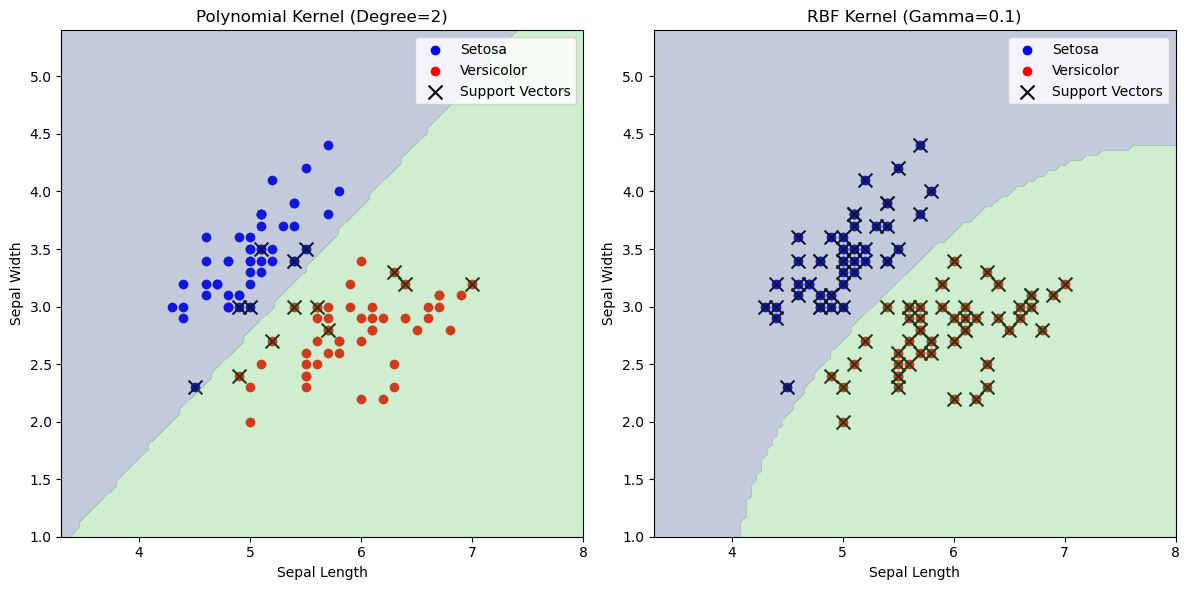

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial and RBF Kernel Functions
def polynomial_kernel(X1, X2, degree=3, coef0=1):
    return (1 + X1.dot(X2.T)) ** degree

def rbf_kernel(X1, X2, gamma=0.1):
    sq_dists_X1 = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
    sq_dists_X2 = np.sum(X2 ** 2, axis=1).reshape(-1, 1)
    return np.exp(-gamma * (sq_dists_X1 + sq_dists_X2.T - 2 * X1.dot(X2.T)))

# Support Vector Classifier with Kernel - Dual Form
def support_vector_classifier_kernel(X, y, C=1.0, kernel_func=None, epochs=1000, lr=0.001):
    X_kernel = kernel_func(X, X)

    # Initialize dual coefficients
    alpha = np.zeros(len(y))
    b = 0
    support_vectors = []

    for epoch in range(epochs):
        for i in range(len(y)):
            margin = y[i] * (np.dot(X_kernel[i], alpha * y) + b)
            if margin < 1:
                alpha[i] += lr * C * (1 - margin)
                b += lr * C * y[i]
            else:
                alpha[i] -= lr * (2 * (1 / epochs) * alpha[i])

    # Identify support vectors
    support_vectors = X[alpha > 1e-5]
    return alpha, b, support_vectors

# Plot Decision Boundary Function with Kernel
def plot_decision_boundary_kernel(X, y, alpha, b, support_vectors, title, ax, kernel_func):
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color='black', marker='x', s=100, label='Support Vectors')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_kernel_grid = kernel_func(X, X_grid)
    Z = np.dot(X_kernel_grid.T, alpha * y) + b

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()
    ax.set_title(title)

# Train and Plot Classifier with Polynomial and RBF Kernels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
kernels = [
    (lambda X1, X2: polynomial_kernel(X1, X2, degree=2), "Polynomial Kernel (Degree=2)"),
    (lambda X1, X2: rbf_kernel(X1, X2, gamma=0.1), "RBF Kernel (Gamma=0.1)")
]

for (kernel_func, title), ax in zip(kernels, axes):
    alpha, b, support_vectors = support_vector_classifier_kernel(X, y, C=1.0, kernel_func=kernel_func)
    plot_decision_boundary_kernel(X, y, alpha, b, support_vectors, title, ax, kernel_func=kernel_func)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_29576\2842205782.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  alpha[i] -= lr * (2 * (1 / epochs) * alpha[i])


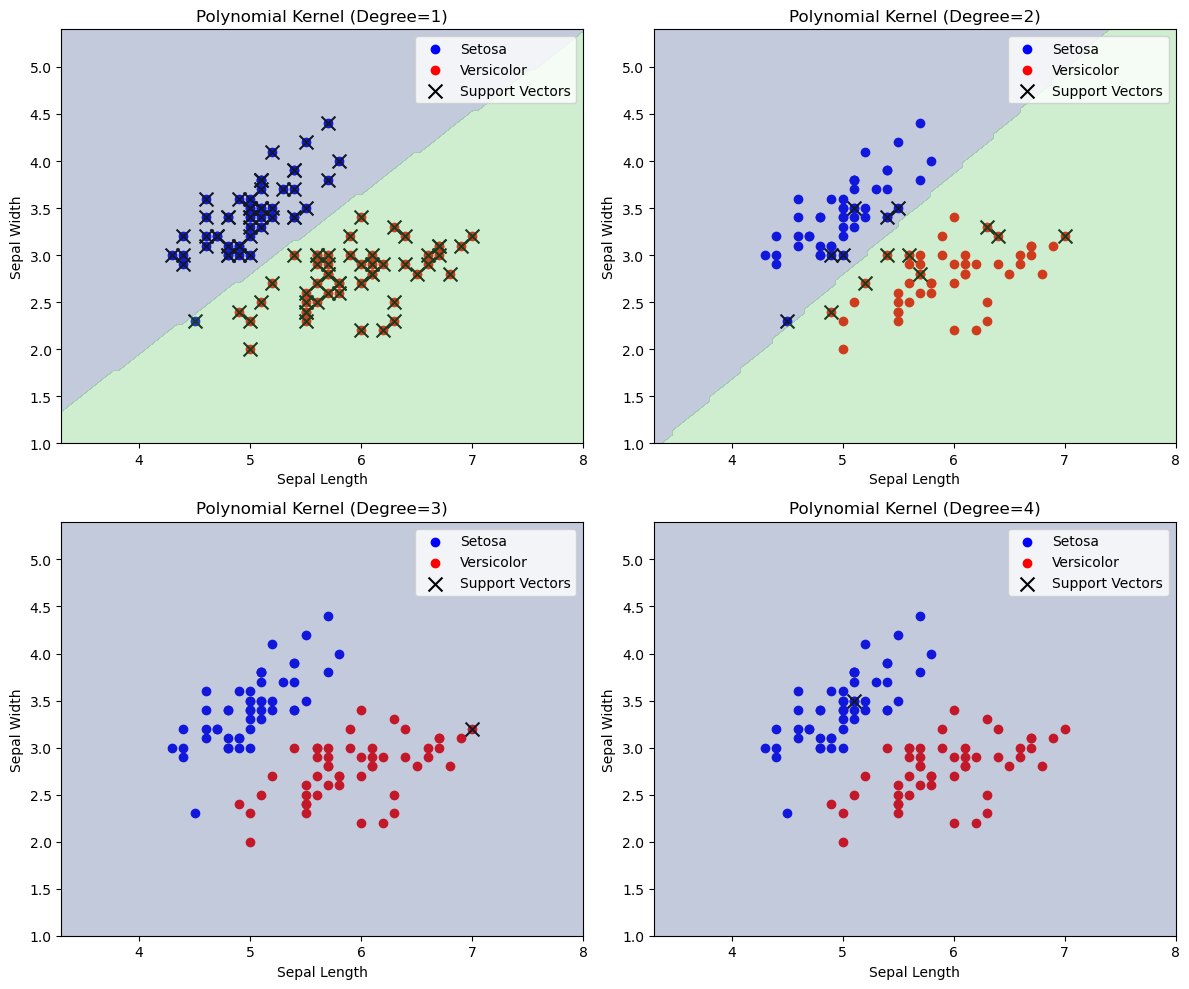

In [8]:
# Train and Plot Polynomial Kernel Classifier with Degrees 2 to 5
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
degrees = [1, 2, 3, 4]
titles = [f'Polynomial Kernel (Degree={degree})' for degree in degrees]

for degree, ax in zip(degrees, axes.ravel()):
    alpha, b, support_vectors = support_vector_classifier_kernel(X, y, C=1.0, kernel_func=lambda X1, X2: polynomial_kernel(X1, X2, degree=degree))
    plot_decision_boundary_kernel(X, y, alpha, b, support_vectors, f"Polynomial Kernel (Degree={degree})", ax, kernel_func=lambda X1, X2: polynomial_kernel(X1, X2, degree=degree))

plt.tight_layout()
plt.show()

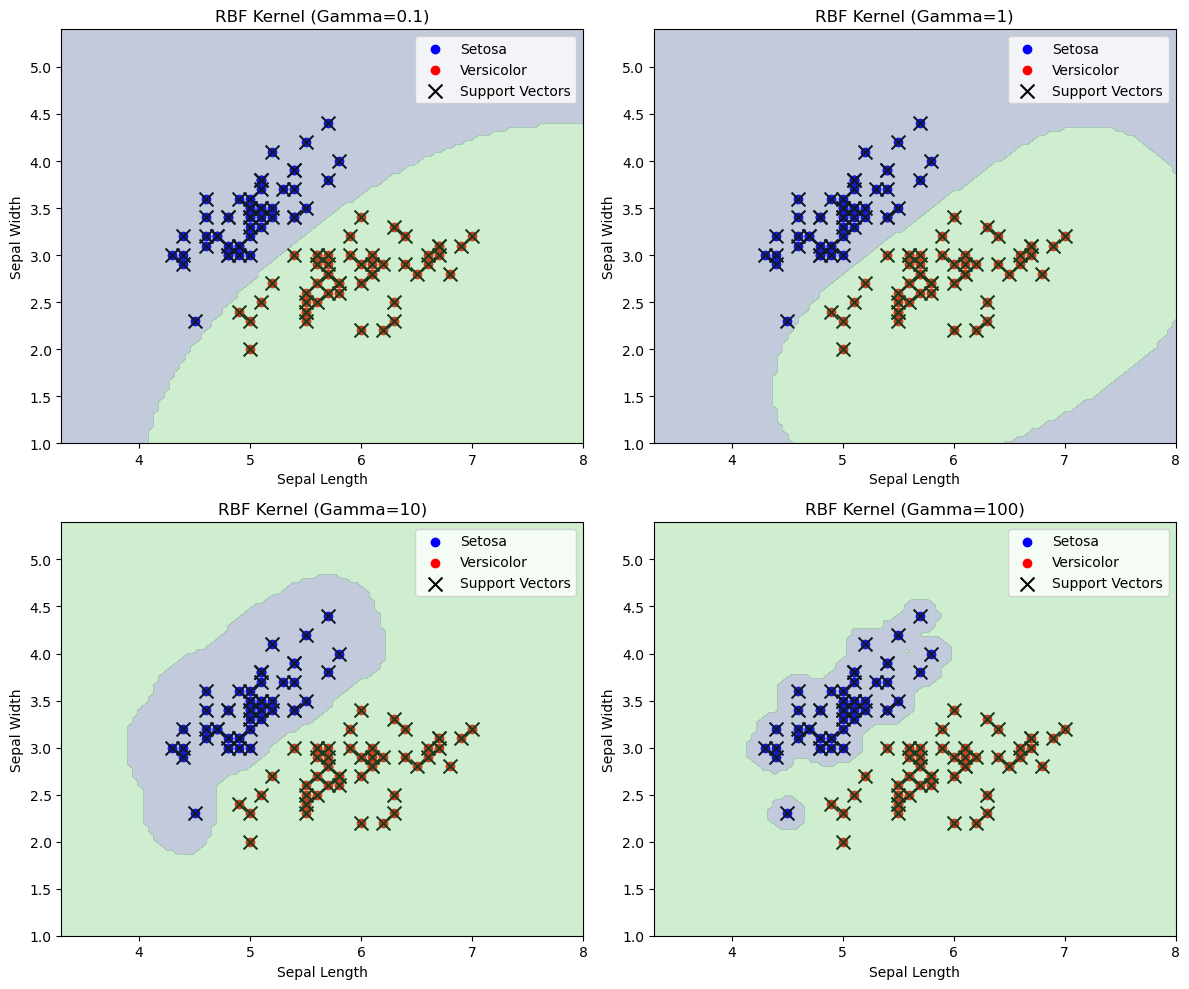

In [9]:
# RBF Kernel Function
def rbf_kernel(X1, X2, gamma=0.1):
    sq_dists_X1 = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
    sq_dists_X2 = np.sum(X2 ** 2, axis=1).reshape(-1, 1)
    return np.exp(-gamma * (sq_dists_X1 + sq_dists_X2.T - 2 * X1.dot(X2.T)))

# Train and Plot RBF Kernel Classifier with Gamma Values 0.1, 1, 10, and 100
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
gammas = [0.1, 1, 10, 100]
titles = [f'RBF Kernel (Gamma={gamma})' for gamma in gammas]

for gamma, ax in zip(gammas, axes.ravel()):
    alpha, b, support_vectors = support_vector_classifier_kernel(X, y, C=1.0, kernel_func=lambda X1, X2: rbf_kernel(X1, X2, gamma=gamma))
    plot_decision_boundary_kernel(X, y, alpha, b, support_vectors, f"RBF Kernel (Gamma={gamma})", ax, kernel_func=lambda X1, X2: rbf_kernel(X1, X2, gamma=gamma))

plt.tight_layout()
plt.show()


## Implementation with Scikit Learn

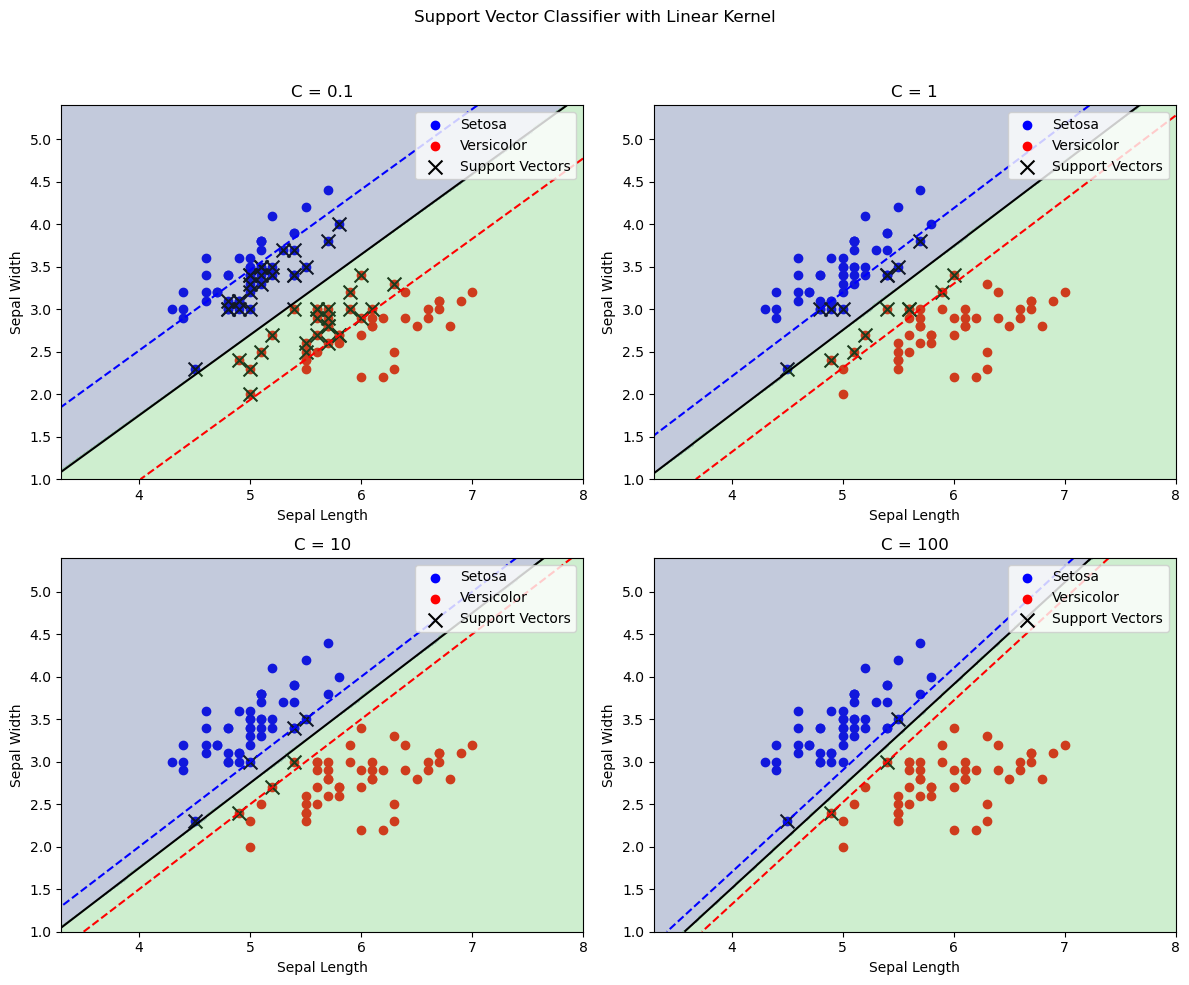

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Define C values and create subplots
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Support Vector Classifier with Linear Kernel")

for C, ax in zip(C_values, axes.ravel()):
    # Train a Support Vector Classifier with a linear kernel
    linear_svc = SVC(kernel='linear', C=C)
    linear_svc.fit(X, y)

    # Plot the data points
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    ax.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1], color='black', marker='x', s=100, label='Support Vectors')

    # Define plot ranges and decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = linear_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    ax.set_title(f"C = {C}")
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

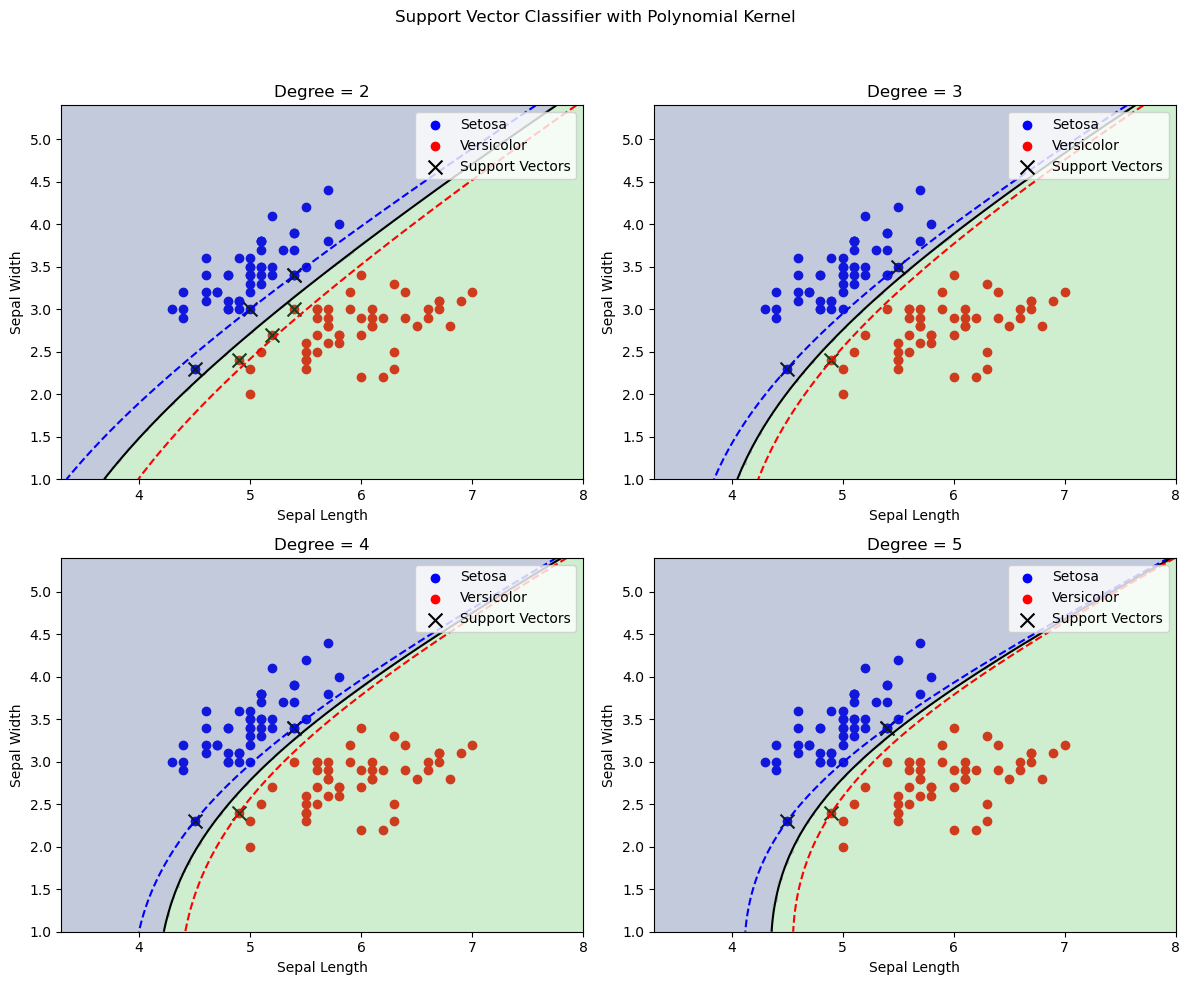

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Support Vector Classifier with Polynomial Kernel")

# Polynomial degrees to test
degrees = [2, 3, 4, 5]

for degree, ax in zip(degrees, axes.ravel()):
    # Train a Support Vector Classifier with a polynomial kernel
    poly_svc = SVC(kernel='poly', degree=degree, C=1.0)
    poly_svc.fit(X, y)

    # Plot the data points
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    ax.scatter(poly_svc.support_vectors_[:, 0], poly_svc.support_vectors_[:, 1], color='black', marker='x', s=100, label='Support Vectors')

    # Define plot ranges and decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = poly_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    ax.set_title(f"Degree = {degree}")
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


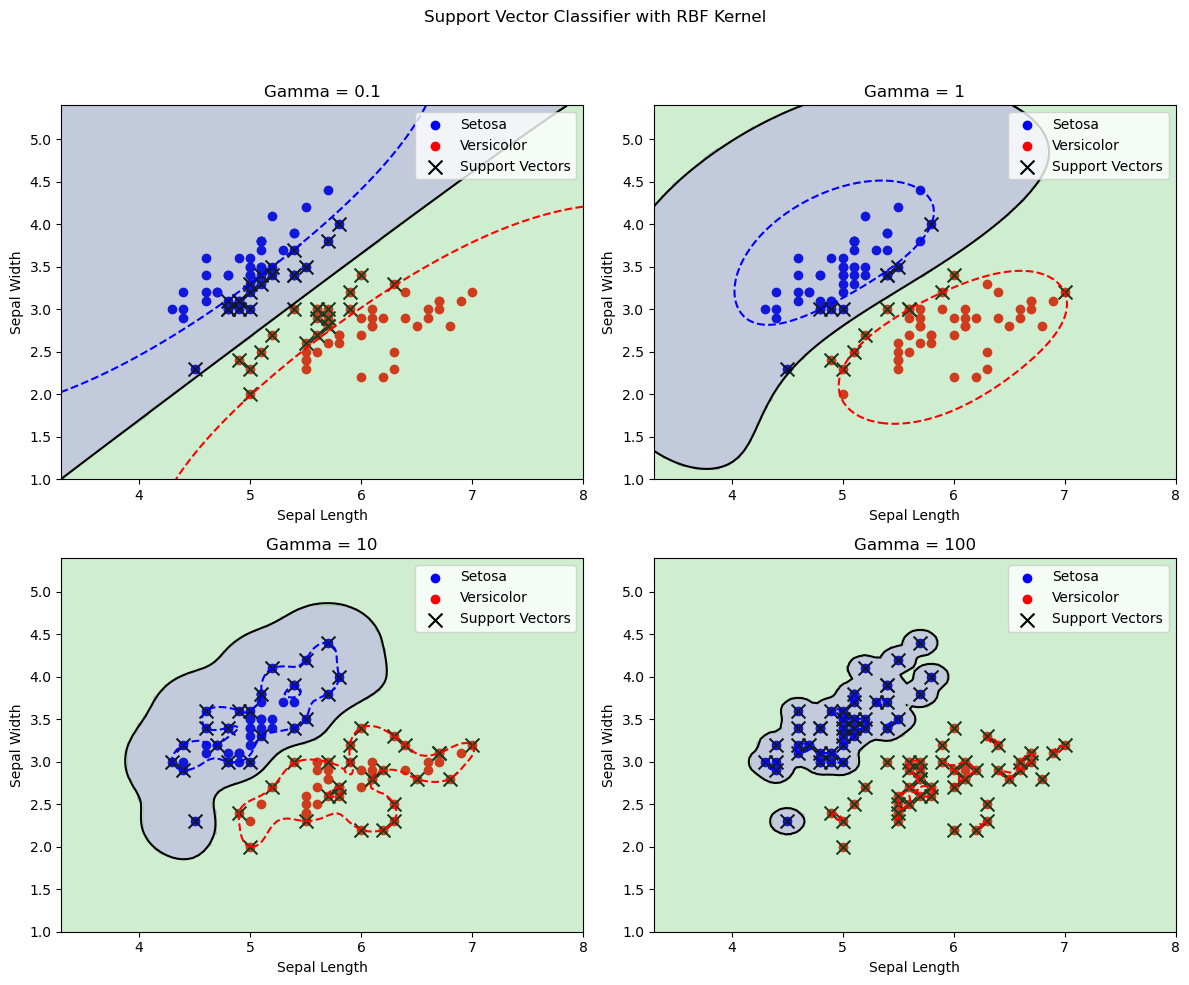

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Support Vector Classifier with RBF Kernel")

# Gamma values to test
gamma_values = [0.1, 1, 10, 100]

for gamma, ax in zip(gamma_values, axes.ravel()):
    # Train a Support Vector Classifier with an RBF kernel
    rbf_svc = SVC(kernel='rbf', gamma=gamma, C=1.0)
    rbf_svc.fit(X, y)

    # Plot the data points
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='blue', label='Setosa')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor')
    ax.scatter(rbf_svc.support_vectors_[:, 0], rbf_svc.support_vectors_[:, 1], color='black', marker='x', s=100, label='Support Vectors')

    # Define plot ranges and decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = rbf_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['--', '-', '--'])
    ax.set_title(f"Gamma = {gamma}")
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
